In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("./data.csv")

In [3]:
data.shape

(520, 17)

In [30]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [6]:
data.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [12]:
Data=data.copy()

In [27]:
Data["class"].unique()

array([ 1., nan])

In [15]:
def to_bit(column_name,data):
    data[column_name]=(data[column_name]=="Yes").astype(int)
for i in Data.columns[2:-1]:
    to_bit(i,Data)

In [ ]:
Data["Gender"]=Data["Gender"].map({"Male":1,"Female":0})
Data["class"]=Data["class"].map({"Positive":int(1),"Negative":int(0)})

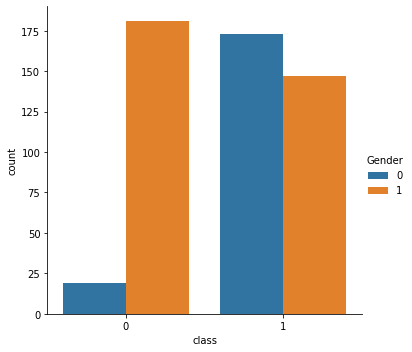

In [34]:
sns.catplot(x="class",kind="count",data=Data,hue="Gender")

In [35]:
from sklearn.model_selection import train_test_split
trainX,testX,trainY,testY=train_test_split(Data.iloc[:,:-1],Data.iloc[:,-1],train_size=0.8,random_state=1)

## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(trainX,trainY)

RandomForestClassifier()

In [38]:
pred=model.predict(testX)

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [40]:
print(accuracy_score(pred,testY))
print(".....................")
print(classification_report(pred,testY))

0.9807692307692307
.....................
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       1.00      0.97      0.99        68

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104



## Support Vector Classifier

In [41]:
from sklearn.svm import SVC
model=SVC(gamma=0.8,degree=0.8,max_iter=10000)
model.fit(trainX,trainY)
pred=model.predict(testX)
accuracy_score(pred,testY)

0.9038461538461539

In [42]:
print(classification_report(pred,testY))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        28
           1       1.00      0.87      0.93        76

    accuracy                           0.90       104
   macro avg       0.87      0.93      0.89       104
weighted avg       0.93      0.90      0.91       104



## KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
accuracy=list()
for i in range(1,100):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(trainX,trainY)
    pred=model.predict(testX)
    accuracy.append(accuracy_score(pred,testY))


In [44]:
print(accuracy[0])

0.9134615384615384


### KNN with K=1 gives the best accuracy

# Artificial Neural Network

In [52]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import normalize
#Normalizing the data
Xtrain=normalize(trainX)
Xtest=normalize(testX)
# Defining the model
model=keras.models.Sequential()
model.add(keras.layers.Flatten()) #Flattens the input
model.add(keras.layers.Dense(128,activation=tf.nn.relu)) #Adding input layer with 128 neurons and relu activation func
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dense(2,activation=tf.nn.softmax))
# Adam Optimiser converges faster than any other existing optimizer
# sparse categorical crossentropy combines the good of crossentropy and one hot encoding
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(Xtrain,trainY,epochs=700,callbacks=False)

Epoch 1/700

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

13/13 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.6106
Epoch 2/700
13/13 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.6106
Epoch 3/700
13/13 [==============================] - 0s 2ms/step - loss: 0.6619 - accuracy: 0.6106
Epoch 4/700
13/13 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.6106
Epoch 5/700
13/13 [==============================] - 0s 2ms/step - loss: 0.6525 - accuracy: 0.6106
Epoch 6/700
1

13/13 [==============================] - 0s 2ms/step - loss: 0.1845 - accuracy: 0.9279
Epoch 76/700
13/13 [==============================] - 0s 2ms/step - loss: 0.1842 - accuracy: 0.9255
Epoch 77/700
13/13 [==============================] - 0s 2ms/step - loss: 0.1830 - accuracy: 0.9279
Epoch 78/700
13/13 [==============================] - 0s 3ms/step - loss: 0.1878 - accuracy: 0.9255
Epoch 79/700
13/13 [==============================] - 0s 2ms/step - loss: 0.1808 - accuracy: 0.9231
Epoch 80/700
13/13 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.9111
Epoch 81/700
13/13 [==============================] - 0s 2ms/step - loss: 0.2133 - accuracy: 0.9014
Epoch 82/700
13/13 [==============================] - 0s 2ms/step - loss: 0.1918 - accuracy: 0.9303
Epoch 83/700
13/13 [==============================] - 0s 3ms/step - loss: 0.1877 - accuracy: 0.9207
Epoch 84/700
13/13 [==============================] - 0s 2ms/step - loss: 0.1809 - accuracy: 0.9303
Epoch 85/700


13/13 [==============================] - 0s 3ms/step - loss: 0.1681 - accuracy: 0.9423
Epoch 157/700
13/13 [==============================] - 0s 2ms/step - loss: 0.1694 - accuracy: 0.9375
Epoch 158/700
13/13 [==============================] - 0s 3ms/step - loss: 0.1692 - accuracy: 0.9351
Epoch 159/700
13/13 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9327
Epoch 160/700
13/13 [==============================] - 0s 3ms/step - loss: 0.1776 - accuracy: 0.9279
Epoch 161/700
13/13 [==============================] - 0s 3ms/step - loss: 0.1728 - accuracy: 0.9399
Epoch 162/700
13/13 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9351
Epoch 163/700
13/13 [==============================] - 0s 2ms/step - loss: 0.1681 - accuracy: 0.9351
Epoch 164/700
13/13 [==============================] - 0s 2ms/step - loss: 0.1681 - accuracy: 0.9351
Epoch 165/700
13/13 [==============================] - 0s 2ms/step - loss: 0.1947 - accuracy: 0.9207
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.1396 - accuracy: 0.9375
Epoch 238/700
13/13 [==============================] - 0s 2ms/step - loss: 0.1427 - accuracy: 0.9471
Epoch 239/700
13/13 [==============================] - 0s 2ms/step - loss: 0.1552 - accuracy: 0.9423
Epoch 240/700
13/13 [==============================] - 0s 2ms/step - loss: 0.1417 - accuracy: 0.9375
Epoch 241/700
13/13 [==============================] - 0s 2ms/step - loss: 0.1336 - accuracy: 0.9471
Epoch 242/700
13/13 [==============================] - 0s 2ms/step - loss: 0.1385 - accuracy: 0.9471
Epoch 243/700
13/13 [==============================] - 0s 2ms/step - loss: 0.1383 - accuracy: 0.9471
Epoch 244/700
13/13 [==============================] - 0s 2ms/step - loss: 0.1316 - accuracy: 0.9543
Epoch 245/700
13/13 [==============================] - 0s 2ms/step - loss: 0.1313 - accuracy: 0.9495
Epoch 246/700
13/13 [==============================] - 0s 2ms/step - loss: 0.1306 - accuracy: 0.9423
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0967 - accuracy: 0.9663
Epoch 319/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.9688
Epoch 320/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0834 - accuracy: 0.9639
Epoch 321/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.9760
Epoch 322/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0728 - accuracy: 0.9688
Epoch 323/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0690 - accuracy: 0.9712
Epoch 324/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0817 - accuracy: 0.9712
Epoch 325/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0841 - accuracy: 0.9663
Epoch 326/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0700 - accuracy: 0.9736
Epoch 327/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0680 - accuracy: 0.9760
Epoc

13/13 [==============================] - 0s 3ms/step - loss: 0.0421 - accuracy: 0.9856
Epoch 400/700
13/13 [==============================] - 0s 3ms/step - loss: 0.0421 - accuracy: 0.9784
Epoch 401/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 0.9856
Epoch 402/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9880
Epoch 403/700
13/13 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9928
Epoch 404/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 0.9904
Epoch 405/700
13/13 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9856
Epoch 406/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 0.9880
Epoch 407/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0346 - accuracy: 0.9928
Epoch 408/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9832
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9928
Epoch 481/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 0.9904
Epoch 482/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 0.9928
Epoch 483/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9904
Epoch 484/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9880
Epoch 485/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 0.9904
Epoch 486/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 0.9928
Epoch 487/700
13/13 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9904
Epoch 488/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9880
Epoch 489/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.9904
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9832
Epoch 562/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.9904
Epoch 563/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 0.9904
Epoch 564/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 0.9904
Epoch 565/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0192 - accuracy: 0.9928
Epoch 566/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9880
Epoch 567/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.9904
Epoch 568/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.9928
Epoch 569/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 0.9952
Epoch 570/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9880
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 0.9880
Epoch 643/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9928
Epoch 644/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9880
Epoch 645/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9928
Epoch 646/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 0.9952
Epoch 647/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0180 - accuracy: 0.9952
Epoch 648/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0167 - accuracy: 0.9952
Epoch 649/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.9928
Epoch 650/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9856
Epoch 651/700
13/13 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.9904
Epoc

In [53]:
loss, accuracy=model.evaluate(Xtest,testY)

4/4 [==============================] - 0s 2ms/step - loss: 0.0804 - accuracy: 0.9712


In [130]:
print(loss)
print("..............")
print(accuracy)

0.07877596467733383
..............
0.9711538553237915


## Using Autoencoder To Reduce The Dimensions

In [2]:
from autoencoder import AutoEncoder

In [ ]:
encoder_model= 